# Statistical tests with R

##### Guilherme Gimenez Jr

## Agenda

1. **About Hypothesis Testing**
2. **Importing our data**
    1. **Setting up hypothesis**
    2. **Jumping right into it**

### 1. About Hypothesis Testing

Building a hypothesis is one of the first steps in starting in the analysis of experiments, it is all about **answering a question**. Of course, before building a hypothesis is always nice to conduct an Exploratory Data Analysis (EDA) to get more insight into what information is available and what lies within the data.

#### What is a hypothesis?

Well, a hypothesis can be thought of as **an educated guess** about something in the data, it **must be testable** either by an experiment or observation**.

When we are proposing a hypothesis we should **write a statement**:

> [...] **if** and **then** [...] are necessary in formalized hypothesis. [...] In a formalized hypothesis, a tentative relationship is stated. [...] Formalized hypotheses contain two variables. One is "independent" and the other is "dependent". The independent variable is the one you, the "scientist" control, and the dependent variable is the one that you observe and/or measure the results. [University of California](https://www.csub.edu/~ddodenhoff/Bio100/Bio100sp04/formattingahypothesis.htm)

A very nice example of a well-written hypothesis:

- **If** skin cancer is **related** to ultraviolet light, **then** people with high exposure to UV light will have a higher frequency of skin cancer.

Notice that we have included the **dependent** variable, _skin cancer_ , the **independent variable**, _UV light_ , and also the expectations, or results, for an experiment, _higher frequency of skin cancer_.

#### What is Hypothesis Testing?

In simple words, we are **test the odds of our results happening by chance** (or if we have meaningful results). In order to do this we need to have a **null hypothesis $H_{0}$** (and an alternative hypothesis $H_{1}$) that we will try to reject or accept.

This is where the most known _p-value_ term is born: in order to determin the statistical significance of the results we analyse the _p-value_ , if is less than or equal to a _particular threshold_ there is evidence against the null hypothesis. Different fields use different threshold values when performing hypothesis testing, in our case we will use $\alpha=0.05$.

> Under the null hypothesis, a parameter of interest is set to a particular value, typically zero, which represents the "no effect" relative to the effectt the research is testing for. [Too Big to Fail: Large Samples and the p-value Problem](https://www.researchgate.net/publication/270504262_Too_Big_to_Fail_Large_Samples_and_the_p-Value_Problem)

The following table shows the possible outcomes:

|||Actual Validity of $H_{0}$|Actual Validity of $H_{0}$|
|-|-|-|-|
|||**$H_{0}$ is true**|**$H_{0}$ is false**|
|**Decision Made**|**Accept $H_{0}$**|True Negative|False Negative (Type II error)|
|**Decision Made**|**Reject $H_{0}$**|False Positive (Type I error)|True Positive|

The _p-value_ is a _very slippery terrain_ and must be dealt with caution. There are some problems related hypothesis testing like:

- A high number of observations can lead to significant _p-values_ even if there is no statistical significance
- Selective reporting and _p-hacking_ are some issues that arrive due to heavy usage of p-values

#### Types of statistical tests 

The appropriate statistical test for the data depend on **the number and type of variables** that will be included in the analysis.

There are [several tables](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/) that can help when choosing the right statistical test to perform. Here we are going to see statistical tests when dealing with **independent groups**.

|Nature of Dependent Variables|Test|
|-|-|

### 2. Importing our data

In order to perform our statistical tests we will use some datasets that are already availabe on R (with our vanilla instalation).

- **esoph** - Smoking, Alcohol And (O)Esophageal Cancer: Data from a case-control study of (o)esophageal cancer in Ille-et-Vilaine, France.
- 

In [1]:
# Let's see which datasets are already available from our vanilla R installation
data()

#### Categorical Testing - esoph

This [data](https://rdrr.io/r/datasets/esoph.html) contains data for 88 age/alcohol/tobacco combinations. These are the following variables:


|Variable|Description|Values|
|-|-|-|
|agegp|Age Group|25--34 years|
|||35--44|
|||45--54|
|||55--64|
|||65--74|
|||75+|
|alcgp|Alcohol consumption|0--39 gm/day|
|||40--79|
|||80--119|
|||120+|
|tobgp|Tobacco Consumption|0--9 gm/day|
|||10--19|
|||20--29|
|||30+|
|ncontrols|Number of controls||
|ncases|Number of cases||

In [2]:
head(esoph)
# If this doesn't work on RStudio, try running this command:
# data(esoph)

,agegp,alcgp,tobgp,ncases,ncontrols
,<ord>,<ord>,<ord>,<dbl>,<dbl>
1,25-34,0-39g/day,0-9g/day,0,40
2,25-34,0-39g/day,10-19,0,10
3,25-34,0-39g/day,20-29,0,6
4,25-34,0-39g/day,30+,0,5
5,25-34,40-79,0-9g/day,0,27
6,25-34,40-79,10-19,0,7


Let's explore our data a little bit, we need to understand our variables types and their distribution...

In [3]:
# Getting statistical information about each variable
summary(esoph)

   agegp          alcgp         tobgp        ncases         ncontrols    
 25-34:15   0-39g/day:23   0-9g/day:24   Min.   : 0.000   Min.   : 1.00  
 35-44:15   40-79    :23   10-19   :24   1st Qu.: 0.000   1st Qu.: 3.00  
 45-54:16   80-119   :21   20-29   :20   Median : 1.000   Median : 6.00  
 55-64:16   120+     :21   30+     :20   Mean   : 2.273   Mean   :11.08  
 65-74:15                                3rd Qu.: 4.000   3rd Qu.:14.00  
 75+  :11                                Max.   :17.000   Max.   :60.00  

OK! We have a very similar distribution of age, alcohol consumption and tobacco consumption in our dataset. Also, instead of having continuous values we have categorical ones.

With this information we can already elect some tests for our data: **categorical like Fisher and chi-squared**.

But we don't have any hypothesis yet.

##### Building our hypothesis

> **If** age is related to (o)esophageal cancer, **then** as age increases, so does the frequency of cases.

###### Choosing our test

This is a nice hypothesis, we are basically testing for evidence that age may be related to (o)esophageal cancer. Because we have 2+ groups for our hypothesis testing (6 age groups). There are several tests that can be used for our hypothesis...

In [4]:
# Let's build a contingency table for our hypothesis
table(esoph$agegp, esoph$ncases)

       
         0  1  2  3  4  5  6  8  9 17
  25-34 14  1  0  0  0  0  0  0  0  0
  35-44 10  2  2  1  0  0  0  0  0  0
  45-54  3  2  2  2  3  2  2  0  0  0
  55-64  0  0  2  4  3  2  2  1  2  0
  65-74  1  4  2  2  2  2  1  0  0  1
  75+    1  7  3  0  0  0  0  0  0  0

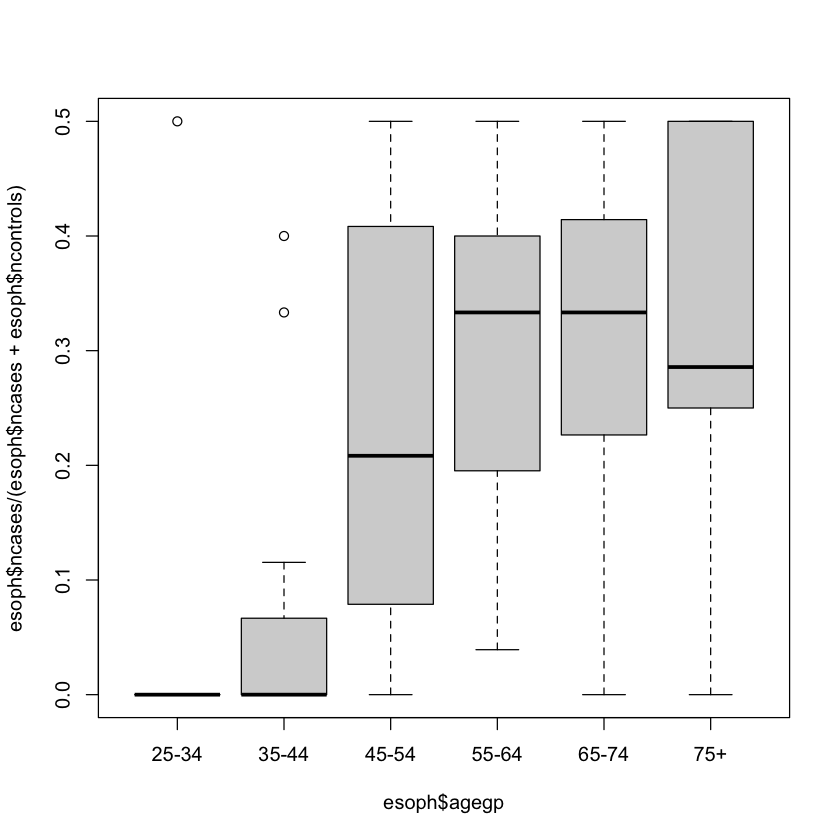

In [5]:
# Let's visualize our data normalizing the number of controls and the number of cases
boxplot(esoph$ncases / (esoph$ncases + esoph$ncontrols) ~ esoph$agegp)

Just by looking at this data, can we see evidence for our hypothesis?

R provides us a very nice interface for performing tests related to **proportions**, this can be done using the `prop.test` interface.

In [6]:
# This can help you finding more information about the test
?prop.test

In [7]:
# To perform our test we need two vectors:
#   1. "Successes": containing the total number of cases
#   2. "Trials": conducting the number of trials

# tapply is a function for applying a function to an array
# think of it as a groupby in this context

case <- tapply(esoph$ncases, esoph$agegp, sum)
total <- tapply(esoph$ncontrols + esoph$ncases, esoph$agegp, sum)

In [8]:
# Finally, let's perform our test, we pass to the function
# the array containing the total number of cases and the total number of trials
prop.test(x=case, n=total)


	6-sample test for equality of proportions without continuity
	correction

data:  case out of total
X-squared = 68.382, df = 5, p-value = 2.224e-13
alternative hypothesis: two.sided
sample estimates:
     prop 1      prop 2      prop 3      prop 4      prop 5      prop 6 
0.008547009 0.043269231 0.177606178 0.238993711 0.254629630 0.228070175 


Let's analyze our results:

**Our p-value is less than our alpha ($2.224*10^{-13}<0.05$) meaning that we succeeded to reject the null hypothesis**, in this case:

- $H_{0}$ The proportion of cases is the same in each age group.
- $H_{1}$ The proportion of cases is **not** the same in each age group.

OK, we have just conducted our first statistical test but..... well, we still haven't evidence to support our hypothesis that there is a linear trend between age group and (o)esophageal cancer.

In [9]:
prop.trend.test(case, total)


	Chi-squared Test for Trend in Proportions

data:  case out of total ,
 using scores: 1 2 3 4 5 6
X-squared = 57.103, df = 1, p-value = 4.136e-14


Again, **our p-value is less than our alpha ($4.136*10^{-14}<0.05$) meaning that we succeeded to reject the null hypothesis**, in this case:

- $H_{0}$ There is **no linear trend** in the proportion of cases across age groups.
- $H_{1}$ There is a **linear trend** in the proportion of cases across age groups.

Keep in mind that **this test can only be used if there is an ordinal variable**, in our case each category group corresponds to an increasing age group.